In [3]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

# constants
PATH = 'shakespeare.txt'
sw = stopwords.words('english')
plt.style.use('ggplot')
# nltk.download('punkt')
# nltk.download('stopwords')

# import data
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

In [4]:
# remove new lines
lines = [line.rstrip('\n') for line in lines]

# make all characters lower
lines = [line.lower() for line in lines]

# remove punctuations from each line
lines = [line.translate(str.maketrans('', '', string.punctuation)) for line in lines]

# tokenize
lines = [word_tokenize(line) for line in lines]

def remove_stopwords(lines, sw = sw):
    '''
    The purpose of this function is to remove stopwords from a given array of 
    lines.
    
    params:
        lines (Array / List) : The list of lines you want to remove the stopwords from
        sw (Set) : The set of stopwords you want to remove
        
    example:
        lines = remove_stopwords(lines = lines, sw = sw)
    '''
    
    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res
    
filtered_lines = remove_stopwords(lines = lines, sw = sw)

In [5]:
w = w2v(
    filtered_lines,
    min_count=3,  
    sg = 1,       
    window=7      
)       

print(w.wv.most_similar('thou'))

emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df.head()

[('thyself', 0.8428505659103394), ('art', 0.8187330365180969), ('villain', 0.7858930826187134), ('dost', 0.7818214893341064), ('kill', 0.7234205007553101), ('traitor', 0.7167534828186035), ('wherefore', 0.7164775133132935), ('wilt', 0.700526237487793), ('fool', 0.6957681775093079), ('didst', 0.6910945177078247)]
(11628, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
thou,-0.138550,0.102719,0.725868,0.719712,-0.596359,-0.671831,0.429324,0.427302,-0.339350,-0.277864,...,0.173640,0.026735,0.384453,0.133078,1.074481,0.683894,-0.552654,-0.219736,0.019298,0.497764
thy,-0.010320,0.244800,0.569296,0.187907,0.162065,-0.167869,0.223307,0.469305,-0.127783,-0.438769,...,0.232055,-0.349321,0.402061,-0.275879,0.398166,0.302081,-0.082639,-0.319407,0.009813,0.066784
shall,-0.021230,0.185968,-0.006066,0.070773,0.597248,-0.300838,0.151901,0.358451,-0.142773,0.202507,...,0.399394,0.100293,-0.065505,-0.191549,0.681468,0.188124,0.180935,-0.092191,0.399071,0.076295
thee,-0.384867,0.300622,0.417836,0.313194,0.099253,-0.293319,0.324683,0.337932,0.127249,-0.260859,...,0.189624,0.021575,0.115977,-0.121680,0.817300,0.379416,0.149820,0.037665,0.271578,0.084534
good,-0.136696,0.352124,0.271049,-0.254043,0.245328,0.154381,0.329168,0.713874,-0.150547,0.101404,...,0.484401,-0.004890,0.240534,-0.028958,0.498113,-0.083670,0.146957,-0.104793,0.415857,-0.152112


In [9]:
w.wv.most_similar('shall')

[('may', 0.8718908429145813),
 ('could', 0.8523656725883484),
 ('youll', 0.8168534636497498),
 ('till', 0.7965694665908813),
 ('ill', 0.7826802134513855),
 ('let', 0.7781540155410767),
 ('doth', 0.7769215703010559),
 ('dare', 0.7729358077049255),
 ('shalt', 0.7686189413070679),
 ('might', 0.7611371278762817)]

PCA on Embeddings

[]

<Figure size 640x480 with 0 Axes>

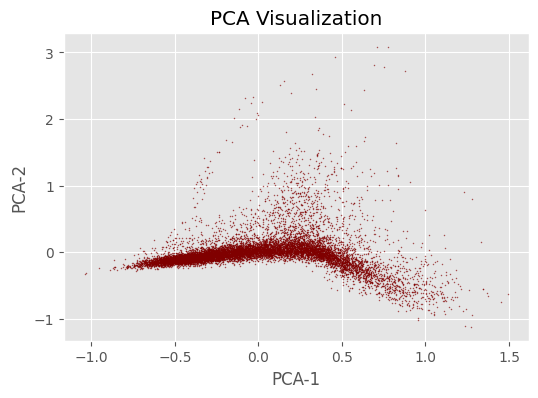

In [6]:
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()